In [7]:
#Stock Market Data Visualization

#pandas and NumPy imports
import pandas as pd
import numpy as np
# Used to grab the stock prices, with yahoo 
import yfinance as yf
# For Visualization
import seaborn as sns
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#Visualizing Tech Stocks
#In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2023:
  #Microsoft (NASDAQ:MSFT)
  #Amazon (NASDAQ:AMZN)
  #Apple (NASDAQ:AAPL)
  #Alphabet (NASDAQ:GOOG)
  #Facebook (NASDAQ:META).

# The tech stocks we'll use for this analysis
symbols = ['MSFT', 'AMZN', 'AAPL', 'GOOG', 'META'] 

In [9]:
# Set up Start and end  times for data grab
start_date ='2019-01-01'
end_date ='2023-05-02'

In [10]:
#For loop for grabing yahoo finance data
stock_data = yf.download(symbols, start_date,end_date)

[*********************100%***********************]  5 of 5 completed


In [11]:
stock_data['Adj Close']

,AAPL,AMZN,GOOG,META,MSFT
Date,,,,,
2019-01-02 00:00:00-05:00,38.105133,76.956497,52.292500,135.679993,96.874718
2019-01-03 00:00:00-05:00,34.309589,75.014000,50.803001,131.740005,93.310883
2019-01-04 00:00:00-05:00,35.774235,78.769501,53.535500,137.949997,97.650696
2019-01-07 00:00:00-05:00,35.694607,81.475502,53.419498,138.050003,97.775230
2019-01-08 00:00:00-05:00,36.375069,82.829002,53.813999,142.529999,98.484169
...,...,...,...,...,...
2023-01-30 00:00:00-05:00,143.000000,100.550003,97.949997,147.059998,242.710007
2023-01-31 00:00:00-05:00,144.289993,103.129997,99.870003,148.970001,247.809998
2023-02-01 00:00:00-05:00,145.429993,105.150002,101.430000,153.119995,252.750000


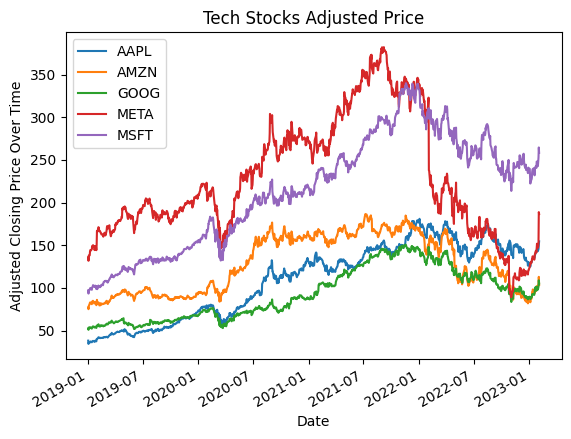

In [43]:
adj_date = stock_data["Adj Close"]
adj_date.plot()
plt.title("Tech Stocks Adjusted Price")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price Over Time")
plt.show()


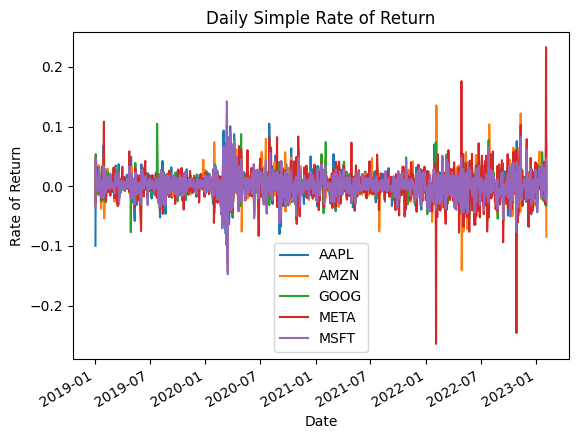

In [44]:
#4.Calculate and plot the daily simple rate of return over time.
#Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately.


daily_return = adj_date.pct_change()

daily_return.plot()
plt.title("Daily Simple Rate of Return")
plt.xlabel("Date")
plt.ylabel("Rate of Return")
plt.show()

In [14]:
#Calculate and visualize the daily simple rate of return
print(daily_return.head())

                               AAPL      AMZN      GOOG      META      MSFT
Date                                                                       
2019-01-02 00:00:00-05:00       NaN       NaN       NaN       NaN       NaN
2019-01-03 00:00:00-05:00 -0.099607 -0.025241 -0.028484 -0.029039 -0.036788
2019-01-04 00:00:00-05:00  0.042689  0.050064  0.053786  0.047138  0.046509
2019-01-07 00:00:00-05:00 -0.002226  0.034353 -0.002167  0.000725  0.001275
2019-01-08 00:00:00-05:00  0.019063  0.016612  0.007385  0.032452  0.007251


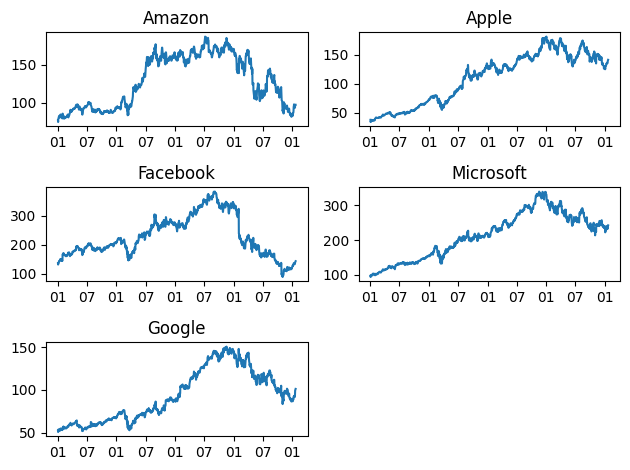

In [48]:
#5.Create subplots of daily simple rate of return.
#In order to better visualize the daily returns, create a subplot for each tech stock.

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%m')
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_formatter(myFmt)
ax3.xaxis.set_major_formatter(myFmt)
ax4.xaxis.set_major_formatter(myFmt)
ax5.xaxis.set_major_formatter(myFmt)
ax1.plot(stock_data['Adj Close']['AMZN'])
ax1.set_title("Amazon")
ax2.plot(stock_data['Adj Close']['AAPL'])
ax2.set_title("Apple")
ax3.plot(stock_data['Adj Close']['META'])
ax3.set_title("Facebook")
ax4.plot(stock_data['Adj Close']['MSFT'])
ax4.set_title("Microsoft")
ax5.plot(stock_data['Adj Close']['GOOG'])
ax5.set_title("Google")

 

plt.tight_layout()
plt.show()


In [34]:
#Calculate and visualize the mean rates of return 

mean_daily_return = daily_return.mean()
print(mean_daily_return)

AAPL    0.001595
AMZN    0.000546
GOOG    0.000887
META    0.000732
MSFT    0.001153
dtype: float64


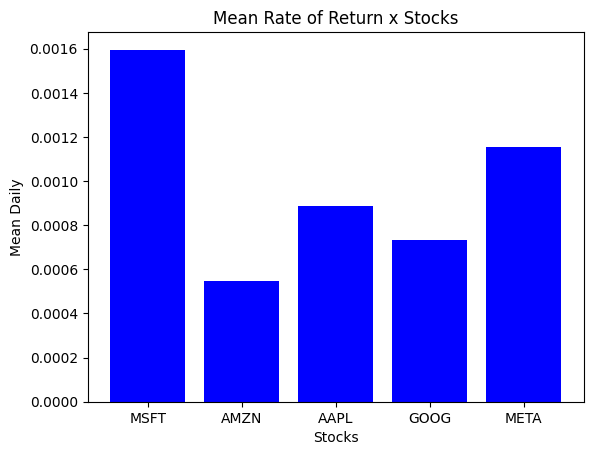

In [35]:
#Plotting bar chart

ax7 = plt.subplot()
ax7.set_xticks(range(len(symbols)))
ax7.set_xticklabels(symbols)

plt.bar(range(len(symbols)), mean_daily_return, color = 'blue')

plt.xlabel('Stocks')
plt.ylabel('Mean Daily')
plt.title('Mean Rate of Return x Stocks')

plt.show()


In [36]:
#Calculate and visualize the variances of the returns
variance_daily_return = daily_return.var()
print(variance_daily_return)

AAPL    0.000471
AMZN    0.000520
GOOG    0.000416
META    0.000829
MSFT    0.000401
dtype: float64


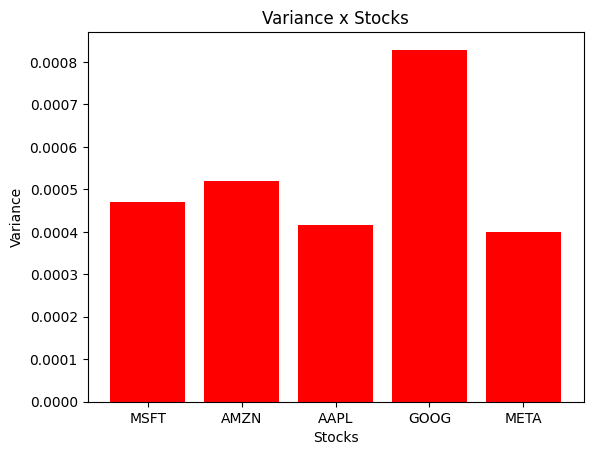

In [37]:
#Plotting bar chart
ax8 = plt.subplot()
ax8.set_xticks(range(len(symbols)))
ax8.set_xticklabels(symbols)

plt.bar(range(len(symbols)), variance_daily_return, color = 'red')

plt.xlabel('Stocks')
plt.ylabel('Variance')
plt.title('Variance x Stocks')

plt.show()


In [38]:
#Analyzing the variance

#Considering the stocks are being analyzed individually, Google is the riskiest one  due to its highest variance.

#Calculate and visualize the standard deviations of the returns

sd_daily_return = daily_return.std()
print(sd_daily_return)

AAPL    0.021694
AMZN    0.022798
GOOG    0.020392
META    0.028786
MSFT    0.020014
dtype: float64


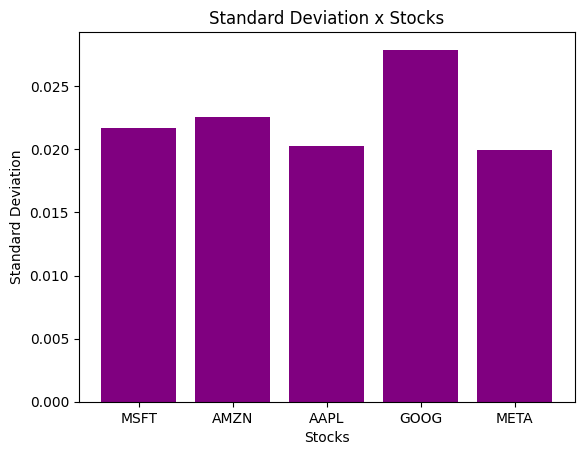

In [47]:
#Plotting bar chart

ax9 = plt.subplot()
ax9.set_xticks(range(len(symbols)))
ax9.set_xticklabels(symbols)

plt.bar(range(len(symbols)), sd_daily_return, color = 'purple')

plt.xlabel('Stocks')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation x Stocks')

plt.show()

In [41]:
#Analyzing the Standard Deviation

#I would choose a stock to invest according to my investor profile. If I'd rather take more risk, I would invest in Google stocks.
#because it brings more return.
#On the other hand, if I was risk-averse, I would invest in Apple stocks because brings a good return with less risk.

#Correlations

correlation= daily_return.corr()
print(correlation)

          AAPL      AMZN      GOOG      META      MSFT
AAPL  1.000000  0.642471  0.697747  0.598035  0.780449
AMZN  0.642471  1.000000  0.678826  0.616790  0.704369
GOOG  0.697747  0.678826  1.000000  0.684435  0.799983
META  0.598035  0.616790  0.684435  1.000000  0.628311
MSFT  0.780449  0.704369  0.799983  0.628311  1.000000


Text(0.5, 1.0, 'Correlation of stock closing price')

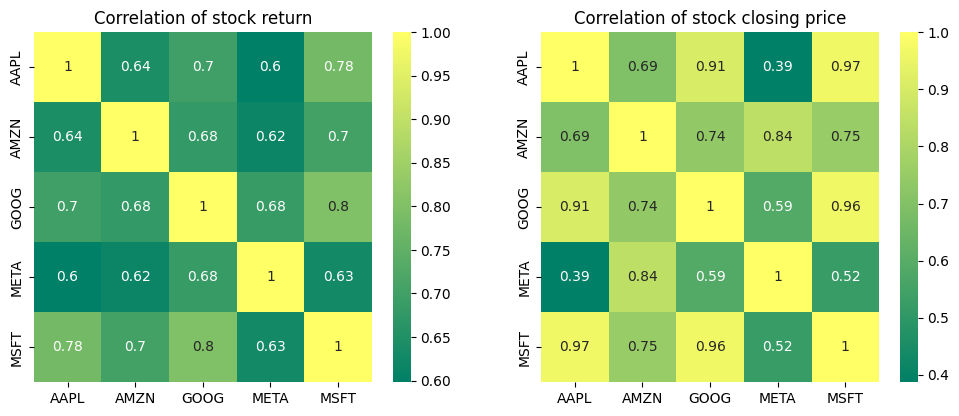

In [42]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.heatmap(daily_return.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(adj_date.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Thesis

Stock Market Analysis and prediction is a project for technical analysis, visualization, and estimation using Google Financial data. Seeing data from the market, especially some general and other software columns. Pandas used to take stock of the information, looked at different aspects of it, and finally looked at it in some way to assess the risk of a stock based on its recent performance history in anticipation of future prices,

The correlations between equities are a crucial feature for traders and investors to take into account when trading stocks. Correlation evaluates the connection between two or more stocks and can reveal market risk, overall trend, and potential diversification possibilities. The tendency of two stocks to move in opposite directions is indicated by a negative correlation, whilst the opposite is true for positive correlations. Investors can make educated choices about which stocks to invest in and how to arrange their portfolios by understanding these correlations.

By examining their daily basic returns or mean returns over a specific time period, analysts can determine correlations between stocks in a straightforward manner. The average returns over a period of time are used to determine.

